### Zadanie domowe 3

Proszę skonstruować klasyfikator oparty o głęboką sieć neuronową dla danych CIFAR-10. 

Do konstrukcji klasyfikatora należy użyć zbioru treningowego danych CIFAR-10 a zbioru testowego CIFAR-10 jako zbioru walidacyjnego do oceny dokładności aktualnego modelu po każdej epoce procedury trenowania. 

Rozwiązaniem powinien być plik .ipynb z kodem w Pythonie wczytującym dane, dokonującym ewentualnych przekształceń danych, trenującym opisany klasyfikator i generującym wykresy dokładności modelu zarówno dla danych treningowych jak i walidacyjnych uzyskanych po każdej epoce trenowania. Procedura trenowania powinna wykorzystywać "patient early stopping" i zapisywać parametry najlepszego modelu do pliku. Po wytrenowaniu, zapisany model powinien zostać wczytany z zapisanego pliku i zastosowany do danych walidacyjnych celem obliczenia i wypisania dokładności osiągniętej dla tych danych.  

Wytrenowany model powinnien osiągać dokładność na danych walidacyjnych wynoszącą co najmniej 70%.

***Wskazówki:*** 
- Zastanowić się jaki powinien być "input shape".
- Model powinien być głęboką siecią neuronową, jednak jej architektura jest pozostawiona Państwa inwencji.

***Termin oddania***: 2 stycznia 2024

In [1]:
import tensorflow.keras as keras

In [2]:
# Wczytanie danych
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [5]:
# Inicjalizacja klasyfikatora
classifier = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [6]:
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
dropout_history = classifier.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=100,
    validation_data=(x_test, y_test),
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            verbose=1,
        ),
        keras.callbacks.ModelCheckpoint(
            filepath='best_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
        ),
    ],
)

Epoch 1/10


2023-12-15 22:58:39.459795: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


500/500 [==============================] - 39s 78ms/step - loss: 1.4040 - accuracy: 0.5002 - val_loss: 1.0844 - val_accuracy: 0.6201
Epoch 2/10
500/500 [==============================] - 38s 76ms/step - loss: 1.0012 - accuracy: 0.6498 - val_loss: 0.9667 - val_accuracy: 0.6635
Epoch 3/10
500/500 [==============================] - 41s 81ms/step - loss: 0.8422 - accuracy: 0.7073 - val_loss: 0.9225 - val_accuracy: 0.6831
Epoch 4/10
500/500 [==============================] - 37s 74ms/step - loss: 0.7227 - accuracy: 0.7477 - val_loss: 0.8375 - val_accuracy: 0.7158
Epoch 5/10
500/500 [==============================] - 36s 73ms/step - loss: 0.6093 - accuracy: 0.7892 - val_loss: 0.8573 - val_accuracy: 0.7131
Epoch 6/10
500/500 [==============================] - 36s 72ms/step - loss: 0.5007 - accuracy: 0.8261 - val_loss: 0.8511 - val_accuracy: 0.7211
Epoch 7/10
500/500 [==============================] - 42s 84ms/step - loss: 0.3901 - accuracy: 0.8664 - val_loss: 0.8375 - val_accuracy: 0.7334
Epo

In [8]:
best_model = keras.models.load_model('best_model.h5')
    
loss, accuracy = best_model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.0033 - accuracy: 0.7356


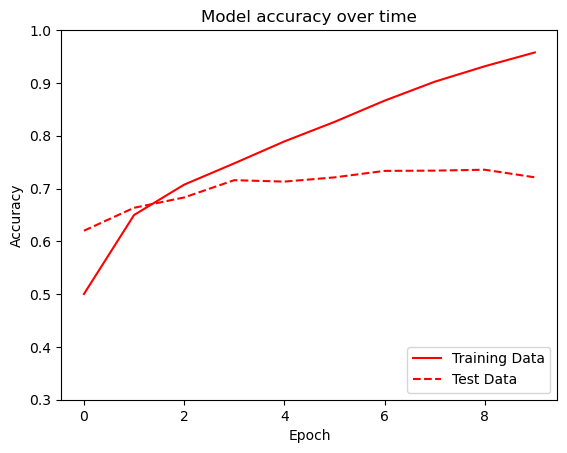

In [9]:
import matplotlib.pyplot as plt
plt.plot(dropout_history.history["accuracy"], color="red")
plt.plot(dropout_history.history["val_accuracy"], color="red", linestyle="dashed")
plt.legend(["Training Data", "Test Data"], loc="lower right")
plt.title("Model accuracy over time")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0.3, 1])
plt.show()
